The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

Bonus:

Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff?

In [3]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline
import env

In [ ]:
# So effectively just replicate what's in the textbook while explaining the process in my own words. 

In [4]:
# a list of column names, the order of which will match the order of the generated dataframe
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
# Use pandas to read a text file.
df = pd.read_csv("curriculum-access.txt", # The file name (in same directory/path as this file)
                 sep="\s", # Delimiter to use, in accordance with how data is separated in the file (spaces)
                 header=None, # this would otherwise infer column names, often resulting in integers
                 names = colnames, # since header was set to none, this gives the column names in line with a list. colnames here.
                 usecols=[0, 2, 3, 4, 5]) # specify the columns generate by sep that we will retain. This is where we lost 'time'
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
# It's missing the time table. That's less fun. Oh well. 

# takes the date column and converts it to the pandas datetime format, reassigned by putting df.date at the beginning.
df.date = pd.to_datetime(df.date)
# recaptures the dataframe with the datetime-formatted column used as the index
df = df.set_index(df.date)
# now that we have a timeseries index we can resample endpoint by day, then get the count for each.
pages = df['endpoint'].resample('d').count()
# display the previous obtained counts for five rows.
pages.head()


date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

<AxesSubplot:xlabel='date'>

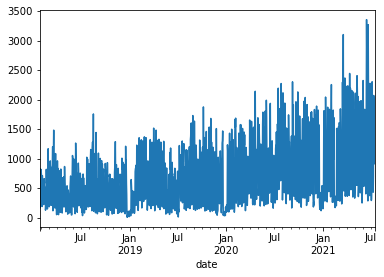

In [9]:
pages.plot()

There is no intent to model this dataset, as such, splitting is unnecessary. Statistics will identify low probability cases.
***
## Exponential Moving Average

_Simple Moving Average_ __(SMA)__ time series are much less noisy---there is less additional __meaningless__ information--than the time series of the original data points. The challenge with SMA, however, is that the values of SMA lag behind the original values, meaning that changes in the trend are only seen with a delay of L time units.    

_Exponential Moving Average_ __(EMA)__ helps reduce the lag that SMA creates. It does this by giving more weight to recent observations, whereas SMA treats all observations with equal weight. 

The EMA function:    
$EMAt = α ∗(t$0$ − EMA$t−1$) + EMA$t − 1

Where:    
- M = Number of time periods; temporal domain; window-span
- $t0$ = Latest value
- $t - 1$ = Previous value
- EMA$t − 1$ = Exponential moving average of previous day     
- The multiplier: α = $2/(M+1)$

                    HOWEVER
Pandas' Exponential Weighted (EW) function, ewm ((perhaps Exponentially Weighted Mean)) will compute our EMA, as long as we define the following. 
M = span (argument that sets the number of time period)

In [11]:
# 7 day EMA
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

date
2018-01-26    572.000000
2018-01-27    376.571429
2018-01-28    287.243243
2018-01-29    485.737143
2018-01-30    540.235595
Freq: D, Name: endpoint, dtype: float64

In [15]:
# 7 day EMA
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()

date
2018-01-26    572.000000
2018-01-27    388.785714
2018-01-28    305.208829
2018-01-29    465.757252
2018-01-30    514.347700
Freq: D, Name: endpoint, dtype: float64

In [12]:
# 30 day EMA
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [18]:
# 60 day EMA
ema_60d = pages.ewm(span=60).mean()
ema_60d.head()

date
2018-01-26    572.000000
2018-01-27    398.150000
2018-01-28    319.551153
2018-01-29    453.613670
2018-01-30    495.979416
Freq: D, Name: endpoint, dtype: float64

In [13]:
# 90 days EMA
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()

date
2018-01-26    572.000000
2018-01-27    399.100000
2018-01-28    321.030081
2018-01-29    452.545042
2018-01-30    494.228442
Freq: D, Name: endpoint, dtype: float64

In [17]:
# 180 days EMA
ema_180d = pages.ewm(span=180).mean()
ema_180d.head()

date
2018-01-26    572.000000
2018-01-27    400.050000
2018-01-28    322.513061
2018-01-29    451.507112
2018-01-30    492.501692
Freq: D, Name: endpoint, dtype: float64

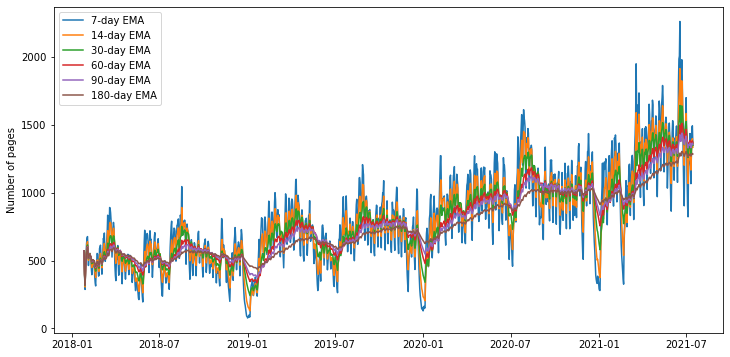

In [22]:
# Setting parameters for the size and allowing for multiple plots to overlap
fig, ax = plt.subplots(figsize=(12,6))

# This would show the daily rate, I opted to disinclude it. 
#ax.plot(pages.index, pages, label='Daily', alpha=.5)

# Individual plots using the index as the x, the ema for the span as y; labeled accordingly
ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_60d, label = '60-day EMA')
ax.plot(pages.index, ema_90d, label = '90-day EMA')
ax.plot(pages.index, ema_180d, label = '180-day EMA')

# sets the legend in the best location based on whitespace
ax.legend(loc='best')
# label for the dependent variable
ax.set_ylabel('Number of pages')

plt.show()

## Bollinger Bands and Percent Bandwidth (%b)
***
#### Bollinger Bands

- indicates volatility, commonly used in stock market trading.

- Comprises 3 lines: Upper Band (UB), Lower Band (LB), and Midband.
***
#### Midband

- The Exponential Moving Average

- `midband = train.ewm(span=30).mean()`
***
#### Upper & Lower Band

- UB/LB = Midband +/- stdev * K

- `stdev = train.ewm(span=30).std()`

- K = the number of standard deviations to go up and down from the EMA
***
#### %b, Percent Bandwidth

- Shows where the last value sits in relation to the bands

- %b =  || (last-LB)/(UB-LB)

- %b > 1 ||=> point lies above UB

- %b < 0 ||=> point lies beyond LB

- %b == .5 ||=> point lies on the midband
***
#### Bandwidth

- The width of the bands

- _Bandwidth_ = (UB-LB)/Midband

In [23]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()

midband.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [24]:
# compute exponential stdev
stdev = pages.ewm(span=span).std()

stdev.head()
# the initial NaN is inevitable

date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.878138
2018-01-29    316.467837
2018-01-30    284.479727
Freq: D, Name: endpoint, dtype: float64

In [25]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub

date
2018-01-26            NaN
2018-01-27    1120.791557
2018-01-28     956.773991
2018-01-29    1406.405897
2018-01-30    1354.808245
                 ...     
2021-07-11    3828.085288
2021-07-12    3867.319606
2021-07-13    3869.549128
2021-07-14    3801.913356
2021-07-15    3717.907020
Freq: D, Name: endpoint, Length: 1267, dtype: float64

In [26]:
lb

date
2018-01-26            NaN
2018-01-27    -330.191557
2018-01-28    -326.494835
2018-01-29    -492.401124
2018-01-30    -352.070116
                 ...     
2021-07-11   -1278.746498
2021-07-12   -1214.970415
2021-07-13   -1135.932143
2021-07-14   -1046.207143
2021-07-15   -1021.407660
Freq: D, Name: endpoint, Length: 1267, dtype: float64

In [27]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,1120.791557,-330.191557
2018-01-28,956.773991,-326.494835
2018-01-29,1406.405897,-492.401124
2018-01-30,1354.808245,-352.070116


In [28]:
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557
2018-01-28,170,315.139578,956.773991,-326.494835
2018-01-29,830,457.002386,1406.405897,-492.401124
2018-01-30,652,501.369064,1354.808245,-352.070116


In [ ]:
# Plot the bands! 
